**Importing required libraries**

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar100

**Loading the dataset**

In [2]:
(train_images, train_labels), (test_images, test_labels)=cifar100.load_data()

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


**Data Visualization with Label Mapping**

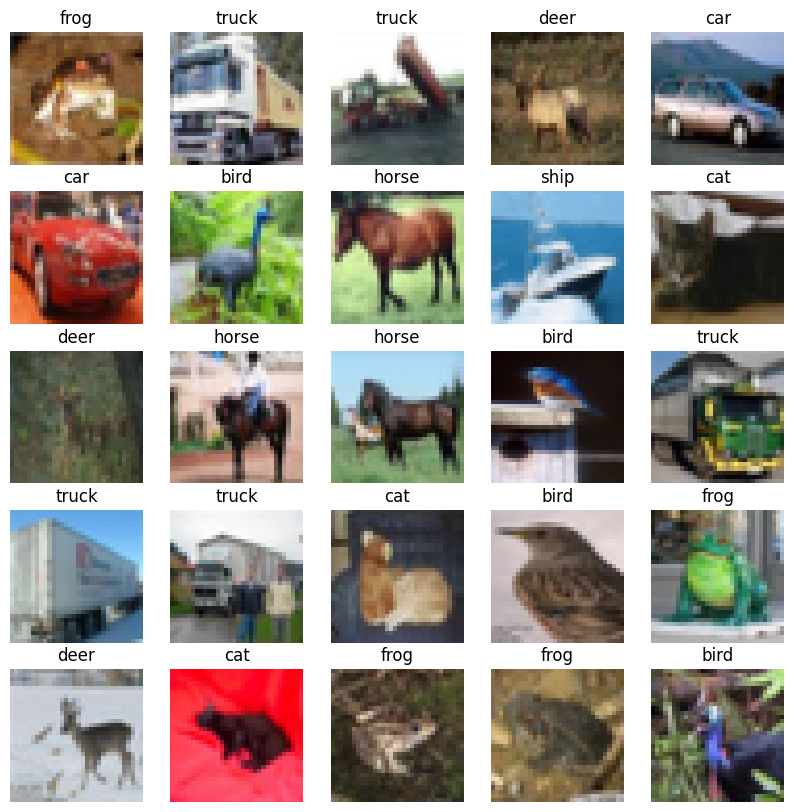

In [6]:
class_names = ['airplane','car','bird','cat','deer',
               'dog','frog','horse','ship','truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(train_images[i])
    plt.title(class_names[train_labels[i][0]])
    plt.axis('off')

plt.show()


**Building CNN**

In [15]:
model=models.Sequential([
    layers.Conv2D(32,(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64,(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128,(3,3), activation='relu'),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')

])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,810 (1.36 MB)

 Trainable params: 356,810 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

**Model Compilation**

In [17]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

**Model training**

In [18]:
history=model.fit(train_images, train_labels, epochs=10, validation_split=0.20, batch_size=64)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 117ms/step - accuracy: 0.3098 - loss: 3.7404 - val_accuracy: 0.5200 - val_loss: 1.3645
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 87s 126ms/step - accuracy: 0.5262 - loss: 1.3270 - val_accuracy: 0.5383 - val_loss: 1.3183
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 121ms/step - accuracy: 0.5871 - loss: 1.1684 - val_accuracy: 0.6043 - val_loss: 1.1382
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 117ms/step - accuracy: 0.6335 - loss: 1.0399 - val_accuracy: 0.6214 - val_loss: 1.1216
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 112ms/step - accuracy: 0.6676 - loss: 0.9355 - val_accuracy: 0.6341 - val_loss: 1.0628
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 92s 127ms/step - accuracy: 0.6951 - loss: 0.8637 - val_accuracy: 0.6519 - val_loss: 1.0427
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.7205 - loss: 0.7895 - val_accuracy: 0.6558 - val_loss: 1.0399
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 115ms/step - accuracy: 0.7569 - loss: 0

**Learning Curve**

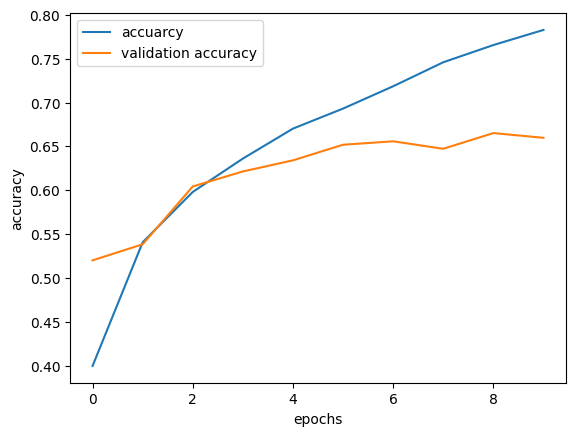

In [19]:
plt.plot(history.history['accuracy'], label='accuarcy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('epochs')
plt.ylabel("accuracy")
plt.legend()
plt.show()

**Model Evaluation**

In [20]:
test_loss, test_acc=model.evaluate(test_images, test_labels)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.6600 - loss: 1.1022
0.6557999849319458


**Making Predictions**

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


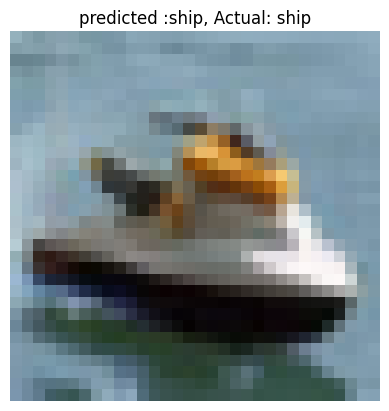

In [23]:
predictions=model.predict(test_images)

i=np.random.randint(0,len(test_images))
plt.imshow(test_images[i])
plt.title(f"predicted :{class_names[np.argmax(predictions[i])]}, Actual: {class_names[test_labels[i][0]]}")
plt.axis("off")
plt.show()